In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import numpy as np
import beadpy
import pandas as pd

In [ ]:
%matplotlib inline

In [118]:
def trajectory_simulator(pre_duration = 250, pre_sigma = 50, post = 250, mean_duration = 1000, duration_sigma = 100, mean_rate = 500, 
                         rate_sigma = 50, noise_sigma = 500, pause_prob = 0.1, 
                         pause_duration_prob = 0.2, rate_change_prob = 0.2, trajectory_number = 0):
    length = int(np.random.normal(loc=mean_duration, scale = duration_sigma))
    current_rate = 0
    pre = int(np.random.normal(loc=pre_duration, scale = pre_sigma))
    rate = 0
    ratesequence = [0]*pre
    for i in range(0,length):
        pause = random.random()
        if not rate == 0: #When during an event/no pause.
            if (pause <= pause_prob): #Start a pause
                rate = 0
            elif (pause > pause_prob) & (pause <= (pause_prob + rate_change_prob)): #Change the rate
                current_rate = np.random.normal(loc=mean_rate, scale = rate_sigma)
                rate = current_rate
            else: #No rate change
                rate = current_rate          
        elif rate == 0: #When in a pause
            if (pause < (1- pause_duration_prob)): #End the pause
                rate = np.random.normal(loc=mean_rate, scale = rate_sigma)
            else:
                rate = 0
        ratesequence.append(rate)
    for i in range(0,post):
        ratesequence.append(0)
    position = []
    current_position = 0
    for i in range(pre + length + post):
        current_position = current_position + ratesequence[i]
        position.append(current_position)
    nucleotides = []
    for i in range(0,pre + length + post):
        nucleotides.append(float(position[i]+np.random.normal(loc=0.0, scale = noise_sigma)))
    time = range(0, pre + length + post)
    results = pd.DataFrame({'time' : time,
                        'nucleotides' : nucleotides,
                           'rate' : ratesequence,
                           'position' : position})
    results['trajectory'] = trajectory_number
    return results

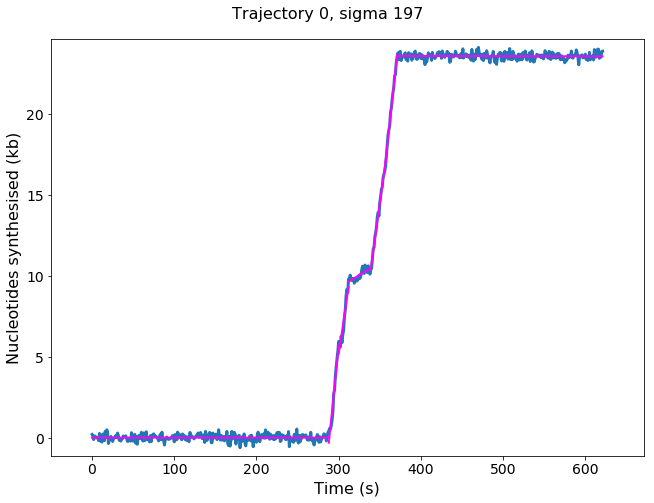

In [181]:
test = trajectory_simulator(pre_duration = 300, pre_sigma = 10, 
                                                   mean_duration = 100, duration_sigma = 10,
                                                   mean_rate = 450, rate_sigma = 150,
                                                   noise_sigma = 200, 
                                                   pause_prob = 0.05,pause_duration_prob = 0.85, trajectory_number = 0)
exampletrajseg = beadpy.trajectory_plotter(test, 0, method = ('auto', 'whole'), 
                                           sigma_start = 10, sigma_end = 250,  
                                           eventregion = (200,500), 
                                           segmenttable = 0)

In [182]:
exampletrajseg

,rate,intercept,x1,x2,y1,y2,displacement,duration,trajectory
0,0.0,-4.0,0.0,288.0,-4.3,-6.2,-1.9,288.0,0.0
1,499.1,-144063.0,288.0,300.0,-319.9,5669.4,5989.3,12.0,0.0
2,344.1,-98086.0,300.0,312.0,5158.8,9288.6,4129.8,12.0,0.0
3,31.1,-83.0,312.0,339.0,9625.6,10465.8,840.2,27.0,0.0
4,370.4,-115194.0,339.0,357.0,10376.4,17043.8,6667.4,18.0,0.0
5,469.4,-150536.0,357.0,371.0,17037.6,23609.1,6571.5,14.0,0.0
6,-0.1,23601.0,371.0,621.0,23561.3,23534.5,-26.9,250.0,0.0


Compare the table of actual changepoints below (ignoring rate changes of less than 10) with the above table of the discovered changepoints above.

In [183]:
changepoints = []
changepoint_values = []
for i in test.time[1:]:
    if abs(test.rate[i] - test.rate[i-1]) > 10:
        changepoints.append(i)
        changepoint_values.append(test.rate[i-1])
cpts = pd.DataFrame({'changepoint' : changepoints,
                    'rate' : changepoint_values})
cpts

,changepoint,rate
0,287,0.000000
1,288,380.930035
2,289,0.000000
3,290,361.689535
4,292,0.000000
5,293,384.404263
6,298,649.326754
7,301,527.642667
8,305,0.000000
9,306,332.600511


Generate a large results table.

In [167]:
results = pd.DataFrame()
for j in range(0,500):
    temp = trajectory_simulator(pre_duration = 300, pre_sigma = 10, 
                                                   mean_duration = 100, duration_sigma = 10,
                                                   mean_rate = 450, rate_sigma = 150,
                                                   noise_sigma = 200, 
                                                   pause_prob = 0.05,pause_duration_prob = 0.2, trajectory_number = j)
    results = results.append(temp)
    

In [168]:
segments = beadpy.segment_finder(results, sigma = 100)

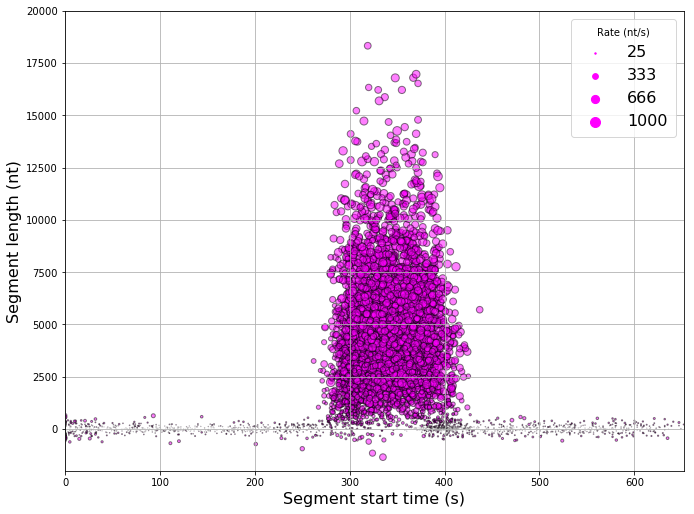

In [172]:
beadpy.segmentplotter(segments,1000,-2000,20000, 1, 10)